In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

In [2]:
def m_euler(func, n_p, a, b, ci):
    """
    Entrada 
    - func la cual debe tener el orden (y, t) con t la variable a la cual se deriva
    - n_p es el número de intervalos que se usarán
    - a, b limite inferior y superior respectivamente
    - ci es func(a). Condición de frontera
    """
    # intervalo
    h = (b-a)/n_p
    
    # almacenando
    nodo = [ci]
    
    t = np.arange(a, b, h)
    
    k = 0
    for i in t:
        yk0 = nodo[k]
        yk1 = yk0 + h*func(yk0, i)
        
        k += 1
        nodo.append(yk1)
        
    return nodo[:-1], t  

In [3]:
def Runge_Kutta(a, b, n, y_0, h, f):
    y_k1 = [y_0]
    t = np.linspace(a,b,n+1)
    
    for i in t[:-1]:
        m_1 = f(y_k1[-1], i)
        m_2 = f(y_k1[-1]+(m_1*h/2), i+(h/2))
        m_3 = f(y_k1[-1]+(m_2*h/2), i+(h/2))
        m_4 = f(y_k1[-1]+(m_3*h), i+h)
        y_k1.append(y_k1[-1] + (h/6)*(m_1+2*m_2+2*m_3+m_4))

    return y_k1, t

In [4]:
def f(y,x):
    
    dy = np.exp(x)/(1+np.exp(x))/y
    
    return dy

In [5]:
a, b = 0, 1
n_p = 100
c = 0.1

h = (b-a)/n_p

nodo, t = m_euler(f, n_p, a, b, c)

nodo3, t3 = Runge_Kutta(a, b, n_p, c, h, f)

t0 = np.arange(a, b, h)

nodo2 = odeint(f, c, t0)

In [6]:
c = -1.37629
anl = lambda x: np.sqrt(2*np.log(1+np.exp(x))+c)

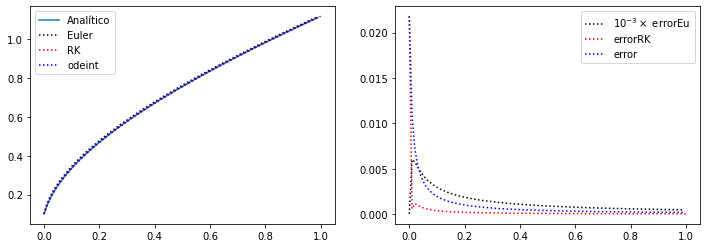

In [16]:
fig, axes = plt.subplots(1,2, figsize=(12,4))

axes[0].plot(t, anl(t),'-', label='Analítico')
axes[0].plot(t, nodo,'k:', label='Euler')
axes[0].plot(t3, nodo3,'r:', label='RK')
axes[0].plot(t0, nodo2[:,0],'b:', label='odeint')

axes[1].plot(t,abs(anl(t)-nodo)/anl(t)*100/1000,'k:', label=r'$10^{-3}\times$ errorEu')
axes[1].plot(t3,abs(anl(t3)-nodo3)/anl(t3)*100,'r:', label='errorRK')
axes[1].plot(t0,abs(anl(t0)-nodo2[:,0])/anl(t0)*100,'b:', label='error')


axes[0].legend()
axes[1].legend()

In [23]:
def Taylor_o2(func, dfunc, n_p, a, b, ci):
    """
    Entrada 
    - func la cual debe tener el orden (y, t) con t la variable a la cual se deriva
    - dfunc derivada(segunda) de func, la cual debe tener el orden (y, t) con t la variable a la cual se deriva
    - n_p es el número de intervalos que se usarán
    - a, b limite inferior y superior respectivamente
    - ci es func(a). Condición de frontera
    """
    
    # intervalo
    h = (b-a)/n_p
    
    # almacenando
    nodo = [ci]
    
    t = np.arange(a, b+h, h)
    
    k = 0
    for i in t:
        yk0 = nodo[k]
        yk1 = yk0 + h*func(yk0, i)+h**2/2*dfunc(yk0, i)
        
        k += 1
        nodo.append(yk1)  
    
    return  nodo[:-1], t 

In [3]:
def f3(y,t):
    return 0.2*y

tmin = 0
tmax = 1
y0 = 50

y, t = m_euler(f3, 10, tmin, tmax, y0)

print(t)
print()
print(y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]

[50, 51.0, 52.02, 53.0604, 54.121608, 55.204040160000005, 56.308120963200004, 57.434283382464, 58.582969050113284, 59.75462843111555, 60.94972099973786]


In [26]:
def f3(y,t):
    return t+y

def df3(y,t):
    return 1+f3(y,t)

tmin = 0
tmax = 1
y0 = 1

y, t = Taylor_o2(f3, df3, 10, tmin, tmax, y0)

print(t)
print()
print(y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

[1, 1.11, 1.24205, 1.39846525, 1.5818041012500001, 1.7948935318812502, 2.0408573527287817, 2.3231473747653038, 2.6455778491156607, 3.012363523272805, 3.42816169321645]


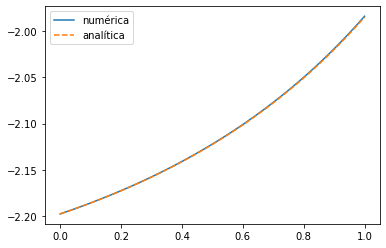

In [4]:
def f3(y,t):
    return np.exp(t+y)

c = 10
fv = lambda x: -np.log(c-np.exp(x))  # analítica

tmin = 0
tmax = 1

y, t = m_euler(f3, 100, tmin, tmax, fv(tmin))

t = np.array(t)

plt.plot(t,y,'-', label='numérica')
plt.plot(t,fv(t), '--', label='analítica')

plt.legend()

In [44]:
def m_euler_M(func, n_p, a, b, ci):
    """
    Entrada 
    - func la cual debe tener el orden (y, t) con t la variable a la cual se deriva
    - n_p es el número de intervalos que se usarán
    - a, b limite inferior y superior respectivamente
    - ci es func(a). Condición de frontera
    """
    # intervalo
    h = (b-a)/n_p
    
    # almacenando
    nodo = [ci]
    nodo_temp = [a]

    a_p = np.arange(a, b+h, h)
    
    for j in range(len(a_p)-1): 
        
        # condiciones iniciales
        yk0 = nodo[j] # y_k 
        t0 = a_p[j]  # t_k
        
        # t+h
        t1 = a_p[j+1]  #t_(k+1)
        
        zi = yk0+h*func(yk0, t0)  # predicción
        yk1 = yk0 + h/2*(func(yk0, t0)+func(zi, t1))  # corrección
        
        # guardando
        nodo.append(yk1)
        nodo_temp.append(t1)

    return nodo, nodo_temp  

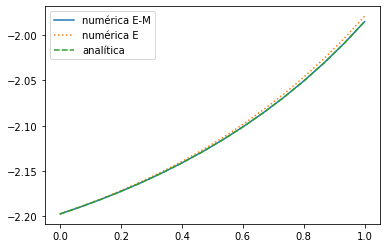

In [49]:
def f3(y,t):
    return np.exp(t+y)

c = 10
fv = lambda x: -np.log(c-np.exp(x))  # analítica

tmin = 0
tmax = 1

y0, t0 = m_euler(f3, 15, tmin, tmax, fv(tmin))
y, t = m_euler_M(f3, 15, tmin, tmax, fv(tmin))

t = np.array(t)

plt.plot(t,y,'-', label='numérica E-M')
plt.plot(t0,y0,':', label='numérica E')
plt.plot(t,fv(t), '--', label='analítica')

plt.legend()

In [51]:
def f3(y,t):
    return t-y

y0, t0 = m_euler(f3, 5, 0, 1, 2)
y, t = m_euler_M(f3, 5, 0, 1, 2)

print(y0[-1], y[-1], t0[-1], t[-1])

1.117504 1.1122195296 1.0 1.0


In [2]:
import numpy as np

In [3]:
def m_euler_Sistem2(func1, func2, n_p, a, b, ci):
    """
    Entrada 
    - func1 y func2 la cual debe tener el orden (y1, y2, t) con t la variable a la cual se deriva
    - n_p es el número de intervalos que se usarán
    - a, b limite inferior y superior respectivamente
    - ci es func1(a), func2(a). Condición de frontera
    """
    # intervalo
    h = (b-a)/n_p
    
    # almacenando
    nodo_1 = [ci[0]]
    nodo_2 = [ci[1]]
    nodo_temp = [a]
    
    a_p = np.arange(a+h, b+h, h)
    
    k = 0
    for i in a_p:
        yk0_1 = nodo_1[k]
        yk0_2 = nodo_2[k]
        
        yk_1 = yk0_1 + h*func1(yk0_1,yk0_2, i)
        yk_2 = yk0_2 + h*func2(yk0_1,yk0_2, i)
        
        k += 1
        nodo_1.append(yk_1)
        nodo_2.append(yk_2)
        nodo_temp.append(i)
        
    return  nodo_1, nodo_2, nodo_temp  

In [4]:
def m_euler_M_sistema(func1, func2, n_p, a, b, ci):
    """
    Entrada 
    - func la cual debe tener el orden (y, t) con t la variable a la cual se deriva
    - n_p es el número de intervalos que se usarán
    - a, b limite inferior y superior respectivamente
    - ci es func(a). Condición de frontera
    """
    # intervalo
    h = (b-a)/n_p
    
    # almacenando
    nodo_1 = [ci[0]]
    nodo_2 = [ci[1]]
    nodo_temp = [a]

    a_p = np.arange(a, b+h, h)
    
    for j in range(len(a_p)-1): 
        
        # condiciones iniciales
        yk0_1 = nodo_1[j]
        yk0_2 = nodo_2[j]
        t0 = a_p[j]
        
        # t+h
        t1 = a_p[j+1]
        
        zi_1 = yk0_1+h*func1(yk0_1, yk0_2, t0)  # predicción
        zi_2 = yk0_2+h*func2(yk0_1, yk0_2, t0)  # predicción
        
        yk1 = yk0_1 + h/2*(func1(yk0_1, yk0_2, t0)+func1(zi_1, zi_2, t1))  # corrección
        yk2 = yk0_2 + h/2*(func2(yk0_1, yk0_2, t0)+func2(zi_1, zi_2, t1))  # corrección
        
        # guardando
        nodo_1.append(yk1)
        nodo_2.append(yk2)
        nodo_temp.append(t1)

    return nodo_1, nodo_2, nodo_temp   

In [ ]:
def euler_mejorado_2EDO(f_1,f_2,n_p,a,b,ci):
    """
    f1, f2 las funciones de la forma y_i' = f_i(x, y, t)
    n_p número de pasos
    a, b límite inferior, y superior respectivamente
    ci condiciones de frontera [f1(a), f2[a]]
    """
    
    h = (b-a)/n_p
    
    nodo_1 = [ci[0]]  # CI para f1
    nodo_2 = [ci[1]]  # CI para f2
    nodo_temp = [a]  # t0
    
    a_p = np.arange(a,b+h,h)  # malla de temporal
     
    for j in a_p:
        #Condiciones iniciales
        yk0_1 = nodo_1[j]
        yk0_2 = nodo_2[j]
        
        t0 = a_p[j]
        t1 = a_p[j+1]
        
        zi = yk0_1+h*f_1(yk0_1,yk0_2,t0)
        z1_2 = yk0_2+h*f_2(yk0_1,yk0_2,t0)
        
        yk1 = yk0_1 + h/2*(f_1(yk0_1, yk0_2, t0)+f_1(zi,zi_2,t1))
        yk2 = yk0_2 + h/2*(f_2(yk0_1, yk0_2,t0)+f_2(zi, zi_2,t1))
        
        nodo.append(yk1)
        nodo_2.append(yk2)
        nodo_temp.append(t1)
        
    return nodo,nodo_2,nodo_temp

In [5]:
#Solucion analítica:
fx = lambda t: 2*np.exp(0.5*t)-np.exp(-t)
fy = lambda t: np.exp(-t)+ np.exp(0.5*t)

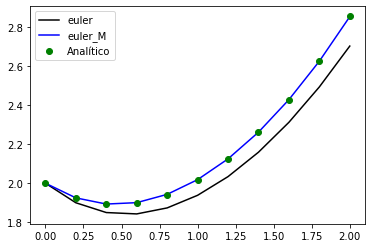

In [13]:
#Ejemplo
dx = lambda x,y, t: y
dy = lambda x,y, t: 0.5*x - 0.5*y

c1 = [1, 2]
c2 = [1, 2]

x, y, t = m_euler_M_sistema(dx, dy, 10, 0, 2, c1)
x1, y1, t1 = m_euler_Sistem2(dx, dy, 10, 0, 2, c2)

import matplotlib.pyplot as plt

t_a = np.array(t)

plt.plot(t1, y1, 'k-',label='euler')
plt.plot(t, y, 'b-',label='euler_M')
plt.plot(t_a, fy(t_a), 'go',label='Analítico')


plt.legend()

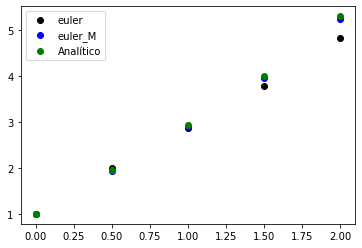

In [27]:
func1 = lambda x, y, t: y
func2 = lambda x, y, t: 0.5*x-0.5*y

ci = [1, 2]
a = 0
b = 2

h = 0.5
n_p = (b-a)/h

x, y, t = m_euler_Sistem2(func1, func2, n_p, a, b, ci)
xM, yM, tM = m_euler_M_sistema(func1, func2, n_p, a, b, ci)


analitico_x = lambda t: 2*np.exp(0.5*t)-np.exp(-t)
analitico_y= lambda t: np.exp(0.5*t)+np.exp(-t)

import matplotlib.pyplot as plt

t_a = np.array(t)

plt.plot(t, x, 'ko',label='euler')
plt.plot(tM, xM, 'bo',label='euler_M')
plt.plot(t_a, analitico_x(t_a), 'go',label='Analítico')


plt.legend()

In [ ]:
def met_euler_mej_sis(f,g,a,b,ci,n=100):
"""
f la funcion a la cual se aplicara este metodo
a y b limites inferior y superior correspondientemente
ci condicion inicial
n numero de particiones
"""
# particion longitud de "h"
h = (b-a)/n
# listas de almacenamiento con condiciones inicial
yk = [ci[0]]
xk = [ci[1]]
tk = [a]
# arreglo de particiones
dt = np.arange(a,b+h,h)
for i in range(n):
zy = yk[i] + h*f(yk[i],xk[i],dt[i])
zx = xk[i] + h*g(yk[i],xk[i],dt[i])

 yk.append(yk[i]+(h/2)*(f(yk[i],xk[i],dt[i])+f(zy,zx,dt[i+1])))
xk.append(xk[i]+(h/2)*(g(yk[i],xk[i],dt[i])+g(zy,zx,dt[i+1])))
tk.append(a+h*(i+1))
return yk, xk, tk

f=lambda y,x,t: y
g=lambda y,x,t:0.5*x-0.5*y
ci=[1,2]
a=0
b=2
n=4
x,y,t=met_euler_mej_sis(f,g,a,b,ci,n)
print(x)
print(y)
print(t)

In [35]:
def m1(f, t, x, y):
    return f(x, y,t)

def m2m3(f, t, y, M1,l1, h):
    
    t1 = t+h/2
    y1 = y+M1*h/2
    x1 = x+l1*h/2

    return f(x1, y1, t1)

def m4(f, t, y, M3, h):
    
    t1 = t+h
    y1 = y+M3*h
    
    return f(y1, t1)

In [ ]:
x'=f1
y'=g1

In [38]:
def RKT4(f1, g1, lim, ci1, ci2, n):
    """
    f función definida f(x, t)
    lim un vector [a, b] donde a es el límite inferio, y b el superior
    ci un vector [f(a)]
    n número de pasos
    """
    # calculando h
    t0 = lim[0]; tf = lim[1]
    h = (tf-t0)/n  # paso
    
    # salvando
    dat_x = [ci1]
    dat_y = [ci2]
    dat_t = [t0]
    
    for k in range(n):
        # semilla
        tk = dat_t[k]
        xk = dat_x[k]
        yk = dat_y[k]
        
        # llamando funciones m_i
        M1 = m1(f, tk, xk, yk)  # x
        l1 = m1(g, tk, xk, yk)  # y
        
        M2 = m2m3(f, tk, xk, yk, M1, l1, h)
        l2 = m2m3(f, tk, xk, yk, M1, l1, h)
        
        M3 = m2m3(f, tk, yk, M2, h)
        M4 = m4(f, tk, yk, M3, h)
    
        
        
        yk1 = yk + h*(M1+2*(M2+M3)+M4)/6
        xk1 = xk + h*(l1+2*(l2+l3)+l4)/6
        
        # Almacenando
        dat_x.append(xk1)
        dat_y.append(yk1)
        dat_t.append(tk+h)
    
    return dat_y, dat_t

In [46]:
def f3(y,t):
    return t-y

lim = [0 ,1]
ci = 2
n =5

#y0, t0 = m_euler(f3, 5, 0, 1, 2)
#y, t = m_euler_M(f3, 5, 0, 1, 2)

yk, tk = RKT4(f3, lim, ci, n)

#datos = []
#for i in range(len(y)):
#    datos.append([t[i], y[i]])

#print(datos)

#print(y0[-1], y[-1], t0[-1], t[-1])




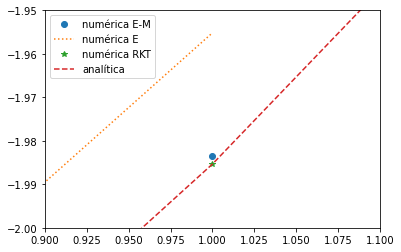

In [61]:
def f3(y,t):
    return np.exp(t+y)

c = 10
fv = lambda x: -np.log(c-np.exp(x))  # analítica

tmin = 0
tmax = 1

lim = [tmin  ,tmax]
ci = fv(tmin)
n = 3


y0, t0 = m_euler(f3, 3, tmin, tmax, fv(tmin))
y, t = m_euler_M(f3, 3, tmin, tmax, fv(tmin))
yk, tk = RKT4(f3, lim, ci, n)

tN = np.arange(tmin, tmax+0.2, 0.1)

plt.plot(t,y,'o', label='numérica E-M')
plt.plot(t0,y0,':', label='numérica E')
plt.plot(tk,yk,'*', label='numérica RKT')
plt.plot(tN,fv(tN), '--', label='analítica')

plt.xlim(0.9,1.1)
plt.ylim(-2,-1.95)
plt.legend()



In [ ]:
def m1(f, t, y):
    return f(y, t)

def m2m3(f, t, y, M1, h):
    
    t1 = t+h/2
    y1 = y+M1*h/2

    return f(y1, t1)

def m4(f, t, y, M3, h):
    
    t1 = t+h
    y1 = y+M3*h
    
    return f(y1, t1)

In [ ]:
def RKT4_Siste(f, lim, ci, n):
    """
    f1 función definida f(x, y, t)
    f2 función definida f(x, y, t)
    lim un vector [a, b] donde a es el límite inferio, y b el superior
    ci un vector [f1(a), f2(a)]
    n número de pasos
    """
    # calculando h
    t0 = lim[0]; tf = lim[1]
    h = (tf-t0)/n  # paso
    
    # salvando
    dat_x = [ci[0]]
    dat_y = [ci[1]]
    dat_t = [t0]
    
    for k in range(n):
        # semilla
        tk = dat_t[k]
        xk = dat_x[k]
        yk = dat_y[k]
        
        # llamando funciones m_i
        M1 = m1(f, tk, yk)
        M2 = m2m3(f, tk, yk, M1, h)
        M3 = m2m3(f, tk, yk, M2, h)
        M4 = m4(f, tk, yk, M3, h)
        
        
        yk1 = yk + h*(M1+2*(M2+M3)+M4)/6
        
        # Almacenando
        dat_x.append()
        dat_y.append(yk1)
        dat_t.append(tk+h)
    
    return dat_x, dat_y, dat_t